In [1]:
# 'yfinance' for extracting price data
import yfinance as module_yf

# 'pandas' for manipulating tabular data
import pandas as module_pd

# 'numpy' for numeric array manipulation
import numpy as module_np

# 'datetime' for manipulating 'datetime' data types
import datetime as module_dt

# 'matplotlib.pyplot' for creating plots
import matplotlib.pyplot as module_plt

# 'tb_custompack' for custom functions
import tb_custompack as module_tb

In [2]:
# Set specified ticker sybol from
# which data will be extracted
ticker_symbol = module_yf.Ticker(
    ticker = "AMZN",
)

In [3]:
# Print out dictionary for information
# about ticker symbol
dict_ticker_info = ticker_symbol.info

In [4]:
# Extract historical price data for ticker
dataframe_ticker_data = ticker_symbol.history(
    interval = '1d',
    period = 'max'
).dropna()

# Set the number of observations
int_data_length = len(dataframe_ticker_data)

In [5]:
# Reset the indexing of the data frame, so new
# 'Date' column is generated
dataframe_prep_1 = dataframe_ticker_data.reset_index()

# Isolate the candlestick price data
dataframe_prep_f = dataframe_prep_1[
    [
        'Open',
        'High',
        'Low',
        'Close'
    ]
]

In [78]:
# Create an intitial value for Heikin Ashi
float_initial = (
    dataframe_prep_f.iloc[0][1] + 
    dataframe_prep_f.iloc[0][2] - 
    dataframe_prep_f.iloc[0][0] - 
    dataframe_prep_f.iloc[0][3]
) / 4

# Create list of Heikin Ashi closes from
# candlestick price data
list_hclose = list(module_np.mean(module_np.log(dataframe_prep_f.T)))

# Create Heikin Ashi indicator list
list_ha = module_tb.function_heikin_ashi_gen(
    list_values = list_hclose,
    float_initial = float_initial,
    float_strength = 1/2
)

In [79]:
# Add indicator to standard indexed dataframe
dataframe_prep_1['Indicator'] = module_pd.Series(list_ha)

# Reassign 'Date' as index series for final dataframe
dataframe_ticker_data = dataframe_prep_1.set_index('Date')

In [80]:
# Set the initial trading time
datetime_start = module_dt.datetime(2021,1,1)

# Set the final trading time
datetime_end = module_dt.datetime(2022,3,1)

# Select all price and indicator data
# falling within the chosen time bound
dataframe_selected_data = dataframe_ticker_data.loc[
    datetime_start:datetime_end
].reset_index()

# Create list of close prices
list_close = list(dataframe_selected_data['Close'])

# Create list for long indicator
list_long_indicator = list(dataframe_selected_data['Indicator'])

# Create list for short indicator
list_short_indicator = list(-dataframe_selected_data['Indicator'])

# Create list for dates
list_dates = list(dataframe_selected_data['Date'])

In [81]:
# Create alpha series for long position
list_capital_1 = module_tb.function_backtester(
    list_prices = list_close,
    list_indicator = list_long_indicator,
    float_ratio = 1
)

In [82]:
# Create alpha series for short position
list_capital_2 = module_tb.function_backtester(
    list_prices = list_close,
    list_indicator = list_short_indicator,
    float_ratio = -1
)

In [83]:
# Create full alpha series
list_capital_3 = list(module_np.multiply(list_capital_1, list_capital_2))

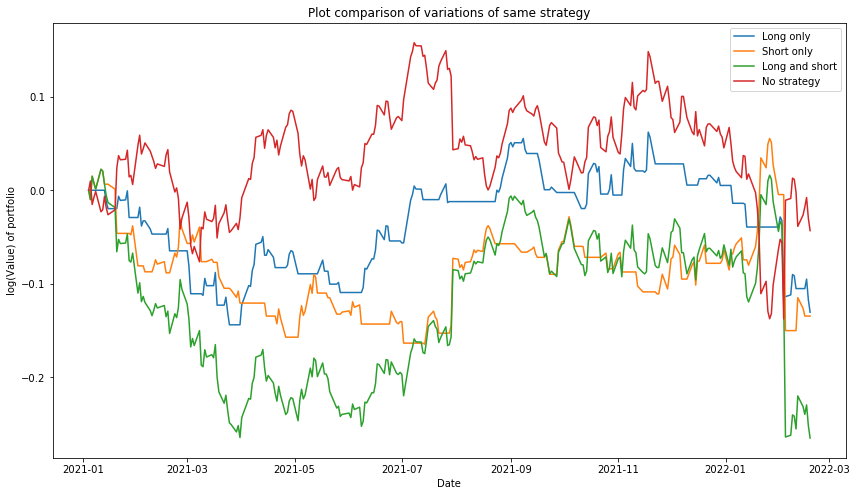

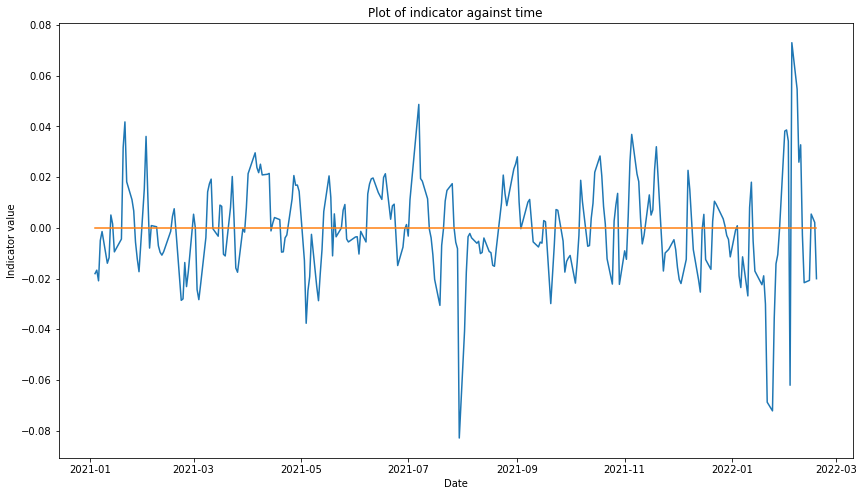

In [108]:
# Code for plot creation

module_plt.figure(
    num = 0,
    figsize = (8 * (16 / 9), 8)
)

module_plt.plot(
    list_dates,
    module_np.log(module_np.cumprod(list_capital_1)),
    label = "Long only"
)

module_plt.plot(
    list_dates,
    module_np.log(module_np.cumprod(list_capital_2)),
    label = "Short only"
)

module_plt.plot(
    list_dates,
    module_np.log(module_np.cumprod(list_capital_3)),
    label = "Long and short"
)

module_plt.plot(
    list_dates,
    module_np.log(module_np.array(list_close) / list_close[0]),
    label = "No strategy"
)

module_plt.xlabel("Date")

module_plt.ylabel("log(Value) of portfolio")

module_plt.title("Plot comparison of variations of same strategy")

module_plt.legend()

module_plt.show()


module_plt.figure(
    num = 0,
    figsize = (8 * (16 / 9), 8)
)

module_plt.plot(
    dataframe_selected_data['Date'],
    dataframe_selected_data['Indicator']
)

module_plt.plot(
    dataframe_selected_data['Date'],
    0 * dataframe_selected_data['Indicator']
)

module_plt.xlabel("Date")

module_plt.ylabel("Indicator value")

module_plt.title("Plot of indicator against time")

module_plt.show()